#1. 수치 미분 Numerical Differentiaion



###1.1 수치 미분
밑바닥부터 시작하는 딥러닝 p.121-125

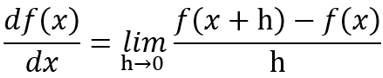

- 수치 미분은 위 정의로부터 구현할 수 있다.

In [ ]:
# 수치 미분 함수 Numerical Differentiation function
# 미분적분학 p.110, 115
# 밑바닥부터 시작하는 딥러닝 p.123
def numerical_diff(f, x):
    h = 1e-5 # 0.00001
    return (f(x + h) - f(x)) / h

image.png

In [ ]:
# 밑바닥부터 시작하는 딥러닝 p.124
def function_1(x):
  return 0.01*x**2 + 0.1*x

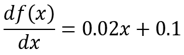

In [ ]:
numerical_diff(function_1, 5)

0.20000010000353893

In [ ]:
numerical_diff(function_1, 10)

0.3000000999620056

###1.2 편미분
밑바닥부터 시작하는 딥러닝 p.125

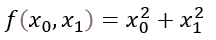

- 앞의 function_1의 함수와 달리 변수가 2개라는 것에 주의하자.

In [ ]:
# [1강] 벡터.행렬.편미분.전미분.최적화.pdf p.8-9
# 밑바닥부터 시작하는 딥러닝 p.125
def function_2(x):
    return x[0]**2 + x[1]**2
    # return np.sum(x**2)

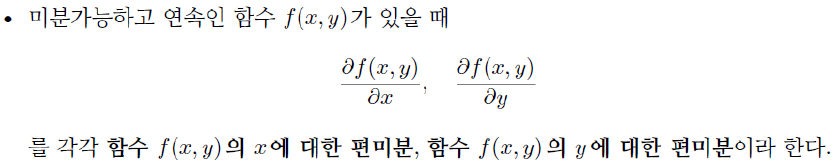

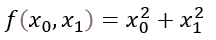

- 편미분에서는 $x$에 대한 편미분은 $x$가 아닌 변수($y$)들은 상수 취급을 한다.

- 반대로 $y$에 대한 편미분은 $y$가 아닌 변수($x$)들을 상수 취급 한다.

- function_2 함수의 편미분을 코드로 구현아면 아래와 같다.

In [ ]:
def function_2_wrt_x0(x):
    return 2*x[0]

In [ ]:
def function_2_wrt_x1(x):
    return 2*x[1]

- $x_0=3$, $x_1=4$에서의 편미분 값은 아래와 같다.

In [ ]:
print(function_2_wrt_x0([3,4]))
print(function_2_wrt_x1([3,4]))

6
8


- **하지만**, 위 방법은 numerical하게 미분을 진행한 것이 아니다.

$x_0 = 3, x_1 = 4$ 일 때, $ \frac{\partial f}{\partial x_0} = ?$

In [ ]:
# 밑바닥부터 시작하는 딥러닝 p.126
# (x0)^2 + 4^2
def function_2_wrt_x0(x0):
    x1 = 4
    return x0**2 + x1**2.0

In [ ]:
numerical_diff(function_2_wrt_x0, 3.0)

6.000009999951316

$x_0 = 3, x_1 = 4$ 일 때, $ \frac{\partial f}{\partial x_1} = ?$

In [ ]:
# 밑바닥부터 시작하는 딥러닝 p.127
# 3^2 + (x1)^2
def function_2_wrt_x1(x1):
    x0 = 3
    return x0**2 + x1**2

In [ ]:
numerical_diff(function_2_wrt_x1, 4.0)

8.00000999952033

**하지만**, 위 코드 또한 완벽한 편미분으로 보기 어렵다.

우리가 편미분을 위해 function_2를 변형해 주었기 때문이다.

**function 함수를 바꾸지 않고, 각 변수마다 편미분 하는 방법은 아래에서 자세히 알아보도록 하자.(Gradient)**

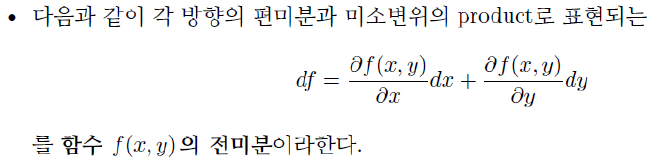

$x_0 = 3, x_1 = 4$ 일 때, $ df= \frac{\partial f}{\partial x_0}dx_0 + \frac{\partial f}{\partial x_1}dx_1 $

In [ ]:
h = 1e-5
df = numerical_diff(function_2_wrt_x0, 3.0)*h + numerical_diff(function_2_wrt_x1, 4.0)*h
print(df)

0.00014000019999471647


$x_0 = 3, x_1 = 4$ 일 때, $ \frac{df}{dx} = ?$

In [ ]:
numerical_diff(function_2, np.array([3.0, 4.0]))

14.000019999471645

$x_0 = 3, x_1 = 4$ 일 때, $ df = ?$

In [ ]:
numerical_diff(function_2, np.array([3.0, 4.0]))*h

0.00014000019999471647

#2. An Introduction to Optimization

###2.1 Gradient & Hessian
[1강] 벡터.행렬.편미분.전미분.최적화.pdf p.22


In [ ]:
import numpy as np

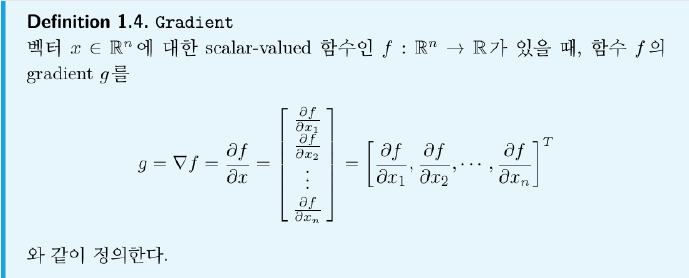

In [ ]:
# 밑바닥부터 시작하는 딥러닝 p.127
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

    # The partial differential of function f with respect to x_idx
    for idx in range(x.size):
        tmp_val = x[idx]
    ##### Fill Your Code #####
        # f(x+h)
        x[idx] = tmp_val+h
        f_x_plus_h = f(x)

        # f(x)
        x[idx] = tmp_val
        fx = f(x)
    #########################
        grad[idx] = (f_x_plus_h - fx) / h
        x[idx] = tmp_val

    return grad

In [ ]:
# 밑바닥부터 시작하는 딥러닝 p.128
numerical_gradient(function_2, np.array([3.0, 4.0]))

In [ ]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([9.99999994e-05, 4.00010000e+00])

In [ ]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6.00010000e+00, 1.00000008e-04])

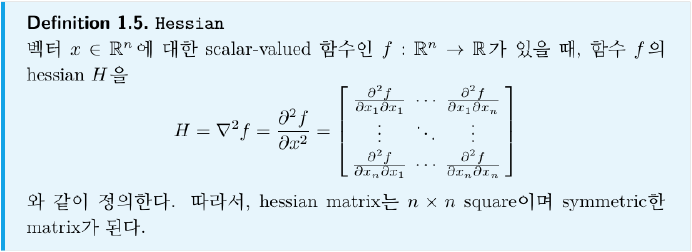

In [ ]:
def numerical_hessian(f, x):
    h = 1e-5 # 0.0001
    hessian = np.zeros_like((x, x)) # x와 형상이 같은 배열을 생성
    x_n = x.copy();

    # The partial differential of function f with respect to x_idx
    for idx in range(x.size):
      x_n[idx] = x[idx] + h
    ##### Fill Your Code #####
      # df(x+h)
      df_x_plus_h = numerical_gradient[hessian]

      # df(x)
      df_x = None
    ##########################
      hessian[:, idx] = (df_x_plus_h - df_x) / h
      x_n = x.copy();
    return hessian

In [ ]:
numerical_hessian(function_2, np.array([3.0, 4.0]))

array([[2.00000017e+00, 3.55271368e-06],
       [0.00000000e+00, 2.00000017e+00]])

- Gradient Visualization

In [ ]:
# 밑바닥부터 시작하는 딥러닝 p.129
import matplotlib.pylab as plt

In [ ]:
def numerical_gradient(f, X):
    def numerical_gradient_of_scalar_function_wrt_vector_x(f, x):
        h = 1e-4 # 0.0001
        grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

        # The partial differential of function f with respect to x_idx
        for idx in range(x.size):
            tmp_val = x[idx]

            # f(x+h)
            x[idx] = tmp_val + h
            f_x_plus_h = f(x)

            # f(x)
            x[idx] = tmp_val
            fx = f(x)

            grad[idx] = (f_x_plus_h - fx) / h

            #x[idx] = tmp_val

        return grad

    if X.ndim == 1:
        return numerical_gradient_of_scalar_function_wrt_vector_x(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = numerical_gradient_of_scalar_function_wrt_vector_x(f, x)

        return grad

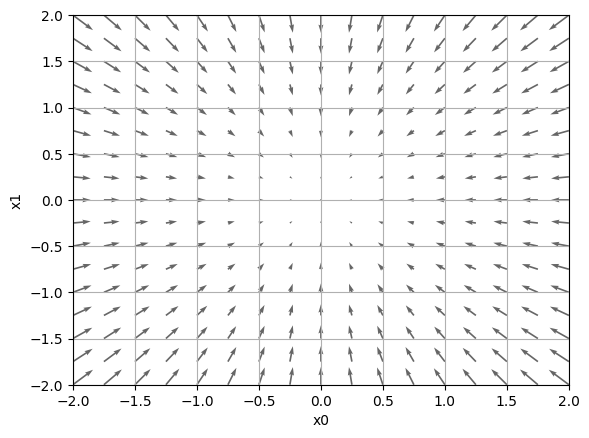

In [ ]:
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)

X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()


def _function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

grad = numerical_gradient(_function_2, np.array([X, Y]) )
# print(grad)

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.draw()
plt.show()

###2.2 Gradient Descent Rule
[1강] 벡터.행렬.편미분.전미분.최적화.pdf p.18-30


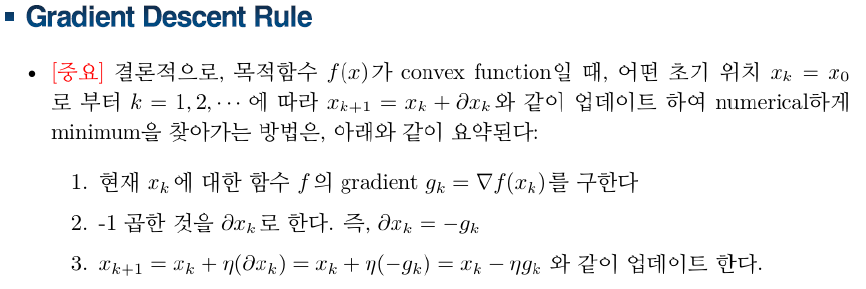

In [ ]:
def function_3(x):
    return (x[0]-2)**2 + (x[1]-5)**2

In [ ]:
# [3강] 벡터.행렬.편미분.전미분.최적화.pdf p.21 ~ 31
# [Day2]_Gradient Descent and Searching Space Topology.pdf p.35
# 밑바닥부터 시작하는 딥러닝 p.131
x_k = np.array([-3.0, 10.0])                  # initial point
eta = 0.01                                    # step size, learning rate, momentum

for k in range(1000):
  ##### Fill Your Code #####
  g_k = numerical_gradient(function_3, x_k)   # step 1
  partial_x_k = -g_k                          # step 2
  x_k = x_k + eta * partial_x_k                 # step 3
  ##########################
print(x_k)

[1.99994999 4.99995001]


In [ ]:
def gradient_descent(f, x_0, eta=0.01, max_iter=100):
    x_k = x_0

    for k in range(max_iter):
        g_k = numerical_gradient(f, x_k)
        partial_x_k = -g_k
        x_k = x_k + eta * partial_x_k  # update variable

    return x_k

In [ ]:
x_0 = np.array([-3.0, 4.0])
x_opt = gradient_descent(function_3, x_0=x_0, eta=0.005, max_iter=1000)
print(x_opt)

[1.99973415 4.99990683]


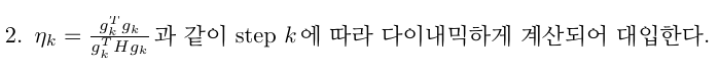

In [ ]:
def gradient_descent_dyn(f, x_0, max_iter=100):
    x_k = x_0

    for k in range(max_iter):
      ##### Fill Your Code #####
        g_k = None
        H_k = numerical_hessian(f, )
        partial_x_k = -g_k
        eta =
      ##########################
        if(np.isnan(eta)):
          eta = 0.0
        x_k = x_k + eta * partial_x_k  # update variable

    return x_k

In [ ]:
x_opt = gradient_descent_dyn(function_3, x_0=x_0, max_iter=5)
print(x_opt)

[1.99995 4.99995]


* Scipy 라이브러리를 활용하여 최적화하기

In [ ]:
from scipy.optimize import minimize
##### Fill Your Code #####
sol = minimize(function_3, x0=x_0, method='Nelson_Mead')
print(sol.x)
##########################

- Update Visualization

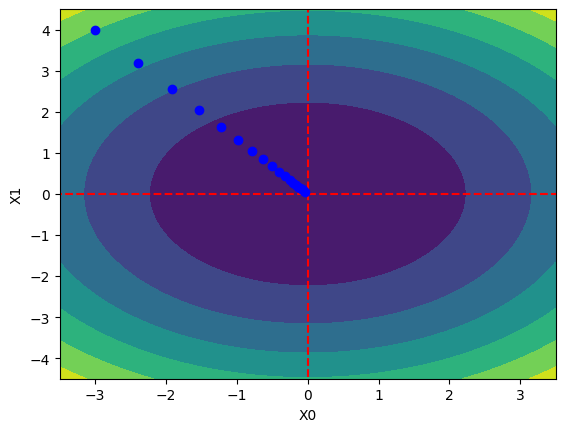

In [ ]:
eta = 0.1
max_iter = 20

def _gradient_descent(f, x_0, eta=0.01, max_iter=100):
    x = x_0
    x_history = []

    for k in range(max_iter):
        x_history.append( x.copy() )

        g = numerical_gradient(f, x)
        x = x - eta * g

    return x, np.array(x_history)

def function_4(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

x_0 = np.array([-3.0, 4.0])

x, x_history = _gradient_descent(function_4, x_0, eta=eta, max_iter=max_iter)

plt.plot( [-5, 5], [0,0], '--r')
plt.plot( [0,0], [-5, 5], '--r')
plt.plot(x_history[:,0], x_history[:,1], 'bo')

# https://www.geeksforgeeks.org/contour-plot-using-matplotlib-python/
feature_x = np.linspace(-3.5, 3.5, 70)
feature_y = np.linspace(-4.5, 4.5, 70)

# Creating 2-D grid of features
[X, Y] = np.meshgrid(feature_x, feature_y)

Z = X ** 2 + Y ** 2

# plots filled contour plot
plt.contourf(X, Y, Z)

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

<ipython-input-76-28bb0da7278d>:13: RuntimeWarning: invalid value encountered in double_scalars
  eta = g.T@g/(g.T@h@g)


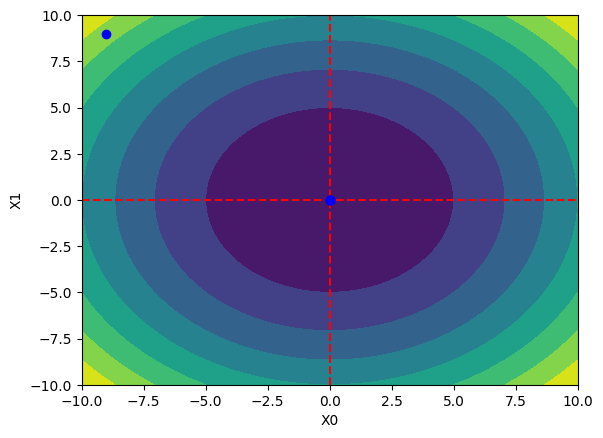

In [ ]:
eta = 0.1
max_iter = 20

def _gradient_descent(f, x_0, eta=0.01, max_iter=100):
    x = x_0
    x_history = []

    for k in range(max_iter):
        x_history.append( x.copy() )

        g = numerical_gradient(f, x)
        h = numerical_hessian(f, x_k)
        eta = g.T@g/(g.T@h@g)
        x = x - eta * g

    return x, np.array(x_history)

def function_4(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

x_0 = np.array([-9.0, 9.0])

x, x_history = _gradient_descent(function_4, x_0, eta=eta, max_iter=max_iter)

plt.plot( [-10, 10], [0,0], '--r')
plt.plot( [0,0], [-10, 10], '--r')
plt.plot(x_history[:,0], x_history[:,1], 'bo')

# https://www.geeksforgeeks.org/contour-plot-using-matplotlib-python/
feature_x = np.linspace(-10, 10, 100)
feature_y = np.linspace(-10, 10, 100)

# Creating 2-D grid of features
[X, Y] = np.meshgrid(feature_x, feature_y)

Z = X ** 2 + Y ** 2

# plots filled contour plot
plt.contourf(X, Y, Z)

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()